In [ ]:
# Ce code est le travail de l'étudiant Mohamed Ali HOUAS

In [17]:
# Question 2/ (a)

import networkx as nx
import numpy as np
import matplotlib.pylab as plt

def degree_distribution(graph, title) : # Fonction pour calculer et afficher la distribution des degrés d'un graphe
    fig, axe = plt.subplots(1, 1, figsize=(12/2,9/2))
    degree = [v for k,v in dict(graph.degree()).items()]
    distribution = [(elem, degree.count(elem)) for elem in sorted(set(degree))]
    k,pk = zip(*distribution)
    PDF = np.array(pk)/sum(pk)
    axe.set_title(title)
    axe.loglog(k, PDF, 'ro')
    axe.set_xlabel("$k$ Degree")
    axe.set_ylabel("$P_k$")

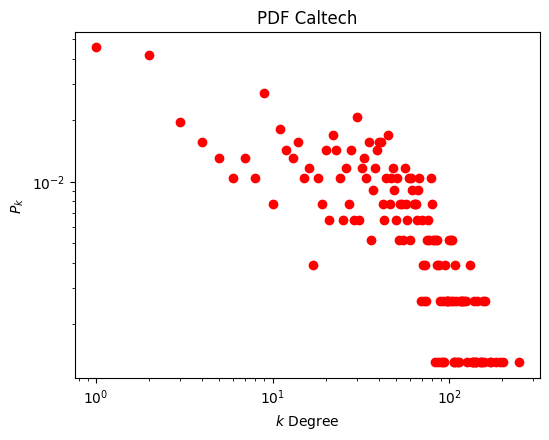

In [19]:
# Lire le graphe Caltech
graphCaltech = nx.read_gml("/home/debian/Téléchargements/fb100/data/Caltech36.gml")

degree_distribution(graphCaltech, "PDF Caltech")

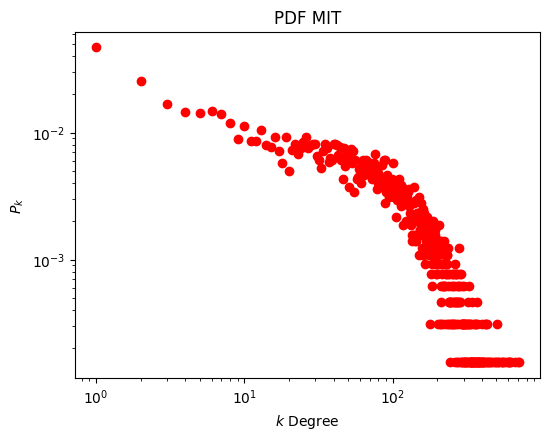

In [20]:
# Lire le graphe MIT
graphMIT = nx.read_gml("/home/debian/Téléchargements/fb100/data/MIT8.gml")

degree_distribution(graphMIT, "PDF MIT")

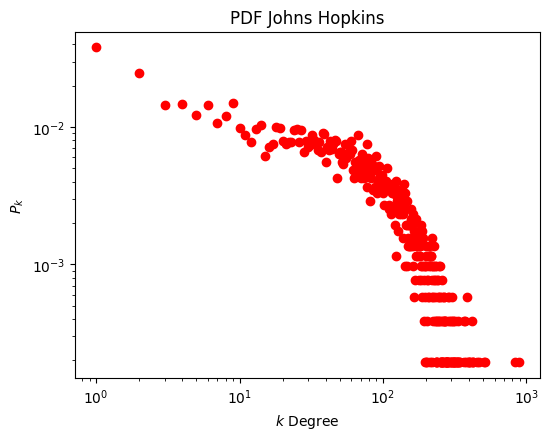

In [21]:
# Lire le graphe Johns Hopkins
graphJH = nx.read_gml("/home/debian/Téléchargements/fb100/data/Johns Hopkins55.gml")

degree_distribution(graphJH, "PDF Johns Hopkins")

In [5]:
# Question 2/ (b)

# Fonction pour calculer et afficher le coefficient de clustering global (transitivity), le coefficient de clustering local moyen
# et la densité relatifs à un graphe
def clustering_density_compute (graph) : 
    print("global clustering coefficient = ",nx.transitivity(graph))
    print("mean local clustering coefficient = ",nx.average_clustering(graph, count_zeros=True))
    nb_nodes = graph.number_of_nodes()
    nb_edges = graph.number_of_edges()
    graph_density = nb_edges/(nb_nodes*(nb_nodes-1))
    print("graph density = ",nx.density(graph))

print ("         Caltech : ")
clustering_density_compute(graphCaltech)
print("\n")
print ("         MIT : ")
clustering_density_compute(graphMIT)
print("\n")
print ("         Johns Hopkins : ")
clustering_density_compute(graphJH)

         Caltech : 
global clustering coefficient =  0.2912826901150874
mean local clustering coefficient =  0.40929439048517247
graph density =  0.05640442132639792


         MIT : 
global clustering coefficient =  0.18028845093502427
mean local clustering coefficient =  0.2712187419501315
graph density =  0.012118119495041378


         Johns Hopkins : 
global clustering coefficient =  0.19316123901594015
mean local clustering coefficient =  0.26839307371293525
graph density =  0.013910200162372396


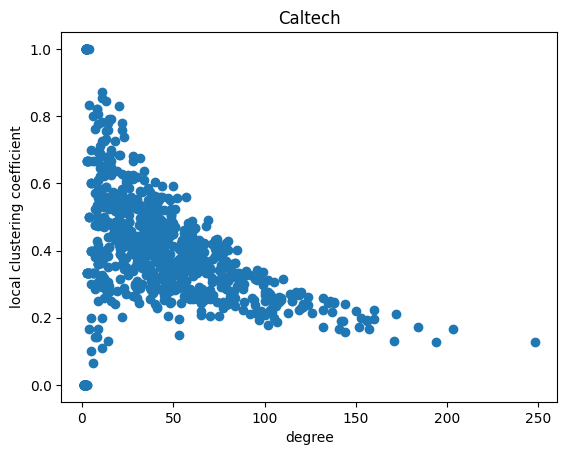

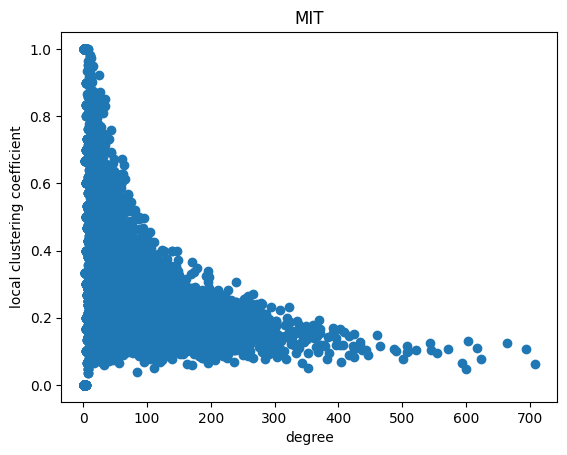

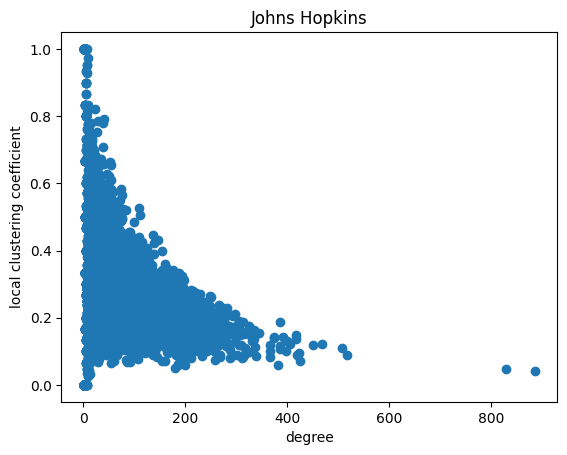

In [16]:
# Question 2/ (c)

import networkx as nx
import numpy as np
import matplotlib.pylab as plt

# Fonction pour tracer un nuage de points coefficient_de_clustering_local en fonction du degree des noeuds
def scatter_degree_clustering(graph, title) :
    degree = [v for k,v in dict(graph.degree()).items()]
    local_clustering = [v for k,v in nx.clustering(graph).items()]
    plt.scatter(degree,local_clustering)
    plt.title(title)
    plt.xlabel("degree")
    plt.ylabel("local clustering coefficient")
    plt.show()

graphCaltech = nx.read_gml("/home/debian/Téléchargements/fb100/data/Caltech36.gml")
graphMIT = nx.read_gml("/home/debian/Téléchargements/fb100/data/MIT8.gml")
graphJH = nx.read_gml("/home/debian/Téléchargements/fb100/data/Johns Hopkins55.gml")

scatter_degree_clustering(graphCaltech,"Caltech")
scatter_degree_clustering(graphMIT,"MIT")
scatter_degree_clustering(graphJH,"Johns Hopkins")

In [7]:
# Question 3/ (a)

from os import listdir

network_size = []
student_fac_assortativity = []
major_assortativity = []
vertex_degree_assortativity = []
dorm_assortativity = []
gender_assortativity = []
gml_files_directory = "/home/debian/Téléchargements/fb100/data/"

for file in listdir(gml_files_directory) :
    graph_to_read = gml_files_directory + file
    graph = nx.read_gml(graph_to_read)
    network_size.append(graph.number_of_nodes())
    student_fac_assortativity.append(nx.attribute_assortativity_coefficient(graph,"student_fac"))
    major_assortativity.append(nx.attribute_assortativity_coefficient(graph,"major_index"))
    vertex_degree_assortativity.append(nx.degree_assortativity_coefficient(graph))
    dorm_assortativity.append(nx.attribute_assortativity_coefficient(graph,"dorm"))
    gender_assortativity.append(nx.attribute_assortativity_coefficient(graph,"gender"))

In [105]:
import pandas as pd

# Fonction pour afficher l'assortativity d'un attribut en fonction de la taille du réseau et la distribution de l'assortativity
def assortativity_scatter_and_distribution_plot(list, title) :

    # conversion de la liste en "pandas Series" pour afficher la distribution avec la fonction "plot" de "pandas"
    list_pds=pd.Series(list)

    plt.subplots(1, 2, figsize=(10,3))
    
    # assortativity en fonction de la taille du réseau
    plt.subplot(1, 2, 1)
    plt.scatter(network_size, list)
    plt.xlabel("network size")
    plt.ylabel(title + " assortativity")
    plt.xscale("log")
    plt.xlim(xmin=100, xmax=100000)
    plt.ylim(ymin=-0.2)
    plt.hlines(y=0, xmin=100, xmax=100000, linestyles="--")

    
    # distribution de l'assortativty
    plt.subplot(1, 2, 2)
    list_pds.plot.kde()
    plt.xlabel(title + " assortativity")
    plt.ylim(ymin=0)
    plt.vlines(x=0, ymin=0, ymax=10, linestyles="--")

    plt.tight_layout(w_pad=4)
    
    plt.show()

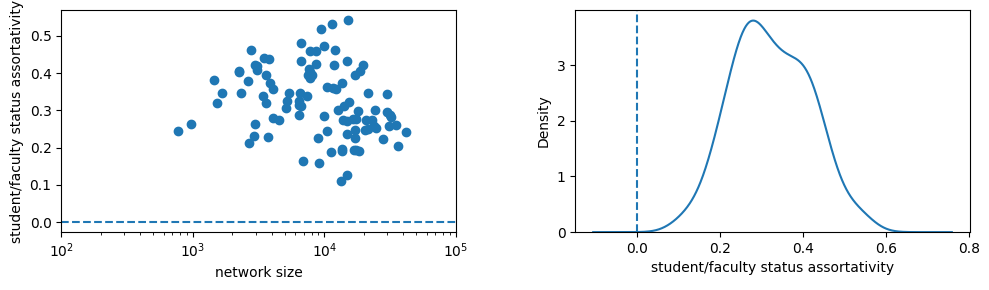

In [104]:
assortativity_scatter_and_distribution_plot(student_fac_assortativity, "student/faculty status")

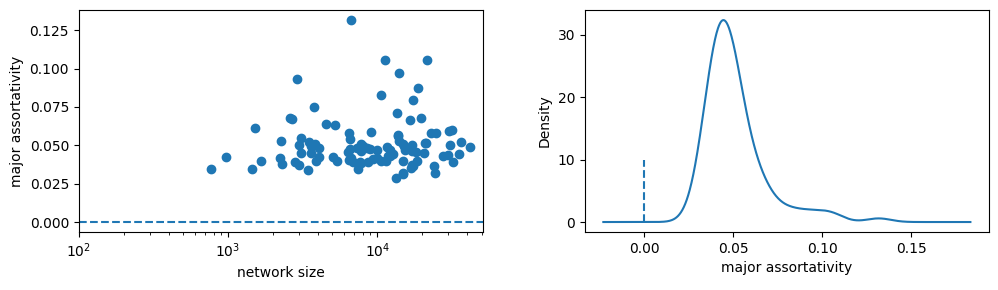

In [84]:
assortativity_scatter_and_distribution_plot(major_assortativity, "major")

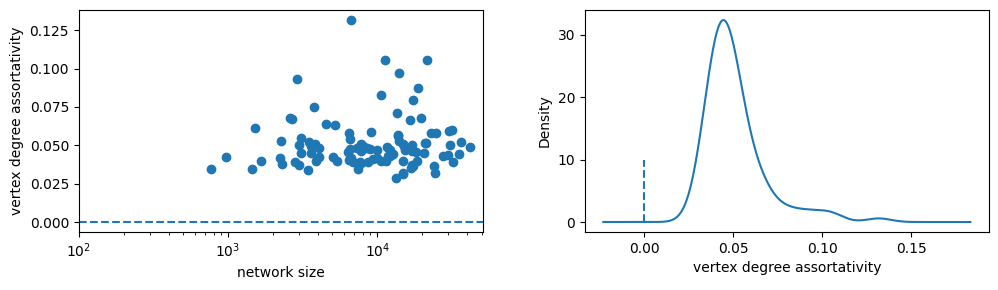

In [86]:
assortativity_scatter_and_distribution_plot(major_assortativity, "vertex degree")

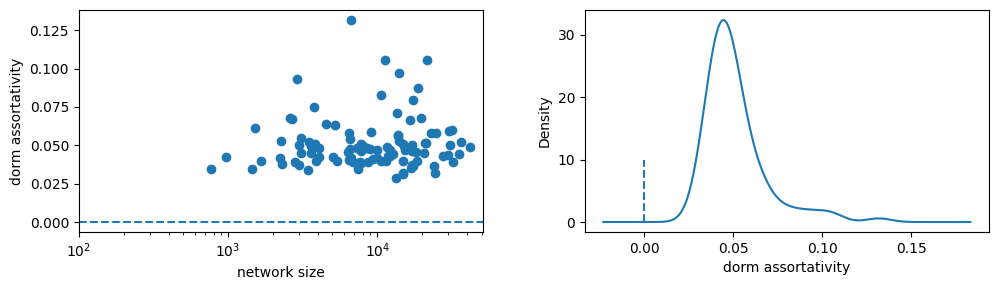

In [87]:
assortativity_scatter_and_distribution_plot(major_assortativity, "dorm")

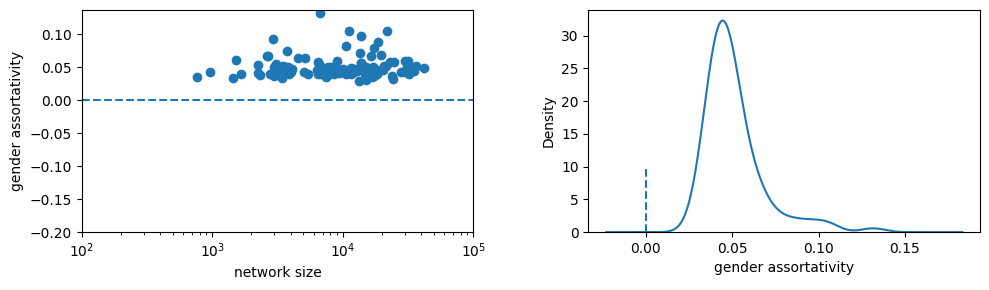

In [106]:
assortativity_scatter_and_distribution_plot(major_assortativity, "gender")

In [11]:
# Question 4/ (b)

from abc import ABC
from abc import abstractmethod
import networkx as nx
import numpy as np

class LinkPrediction ( ABC ) :
    def __init__ ( self , graph ) :
        """
        Constructor

        Parameters
        ----------
            graph : Networkx graph
        """
        self.graph = graph
        self.N = len ( graph )

    def neighbors ( self , v ) :
        """
        Return the neighbors list of a node

        Parameters
        ----------
            v : int
                node id

        Return
        ------
            neighbors_list : python list
        """
        neighbors_list = self.graph.neighbors ( v )
        return list ( neighbors_list )

    @abstractmethod
    def fit ( self ) :
        raise NotImplementedError ( " Fit must be implemented " )



class CommonNeighbors ( LinkPrediction ) :
    def __init__ ( self , graph ) :
        super ( CommonNeighbors , self ).__init__( graph )

    def fit (self) :
        nodes = set(self.graph.nodes())
        commonNeighborsList = []
        for u in nodes :
            for v in nodes - {u} :
                intersectionSize = len( set(self.neighbors(u)) & set(self.neighbors(v)) )
                commonNeighborsList.append((u, v, intersectionSize))
        return commonNeighborsList



class Jaccard ( LinkPrediction ) :
    def __init__ ( self , graph ) :
        super ( Jaccard , self ).__init__( graph )

    def fit (self) :
        nodes = set(self.graph.nodes())
        JaccardList = []
        for u in nodes :
            for v in nodes - {u} :
                unionSize = len( set(self.neighbors(u)) | set(self.neighbors(v)) )
                if unionSize == 0 :
                    JaccardList.append((u, v, 0))
                else :
                    intersectionSize = len( set(self.neighbors(u)) & set(self.neighbors(v)) )
                    JaccardMeasure = intersectionSize / unionSize
                    JaccardList.append((u, v, JaccardMeasure))
        return JaccardList



class AdamicAdar ( LinkPrediction ) :
    def __init__ ( self , graph ) :
        super ( AdamicAdar , self ).__init__( graph )

    def fit (self) :
        nodes = set(self.graph.nodes())
        AdamicAdarList = []
        for u in nodes :
            for v in nodes - {u} :
                commonNeighborsSet = set(self.neighbors(u)) & set(self.neighbors(v))
                if len(commonNeighborsSet) == 0 :
                    AdamicAdarList.append((u, v, 0))
                else :
                    AdamicAdarMeasure = sum ( 1 / log(self.degree(n)) ) for n in commonNeighborsSet if len(self.neighbors(n)) > 1
                    AdamicAdarList.append((u, v, AdamicAdarMeasure))
        return AdamicAdarList 

'\nclass AdamicAdar ( LinkPrediction ) :\n    def __init__ ( self , graph ) :\n        super ( AdamicAdar , self ).__init__( graph )\n\n    def fit (self) :\n        nodes = set(self.graph.nodes())\n        AdamicAdarList = []\n        for u in nodes :\n            for v in nodes - {u} :\n                AdamicAdarMeasure = sum ( 1 / log(self.degree(n)) ) for n in set(self.neighbors(u)) & set(self.neighbors(v))\n                AdamicAdarList.append((u, v, AdamicAdarMeasure))\n        return AdamicAdarList '

In [14]:
# Question 4/ (c)

import random

def LinkPredictionEvaluation (graph, fEdgeToRemove, k) :
    
    """
        Evaluer les performances d'un algorithme de prédiction de liens

        paramètres
        ----------
        graph : un graphe networkx
        
        fEdgeToRemove : entier
                        la fraction de noeuds à supprimer

        k : entier
            les k liens ayant les valeurs de métrique les plus élevées

        Retourne
        --------
        un tuple de 3 réels : (top@k, precision@k, recall@k)
    """

    # 2)
    # Nombre de noeuds à éliminer du graphe 
    NEdgesRemove = int(graph.number_of_edges()*fEdgeToRemove)
    # Séléction aléatoire des liens à éliminer
    Eremoved = random.sample( list(graph.edges()), NEdgesRemove )

    # 3)
    # Le graphe après suppression des liens
    graph.remove_edges_from(Eremoved)
    # Instanciation d'ne classe de prédiction de liens
    graphLinkPrediction = Jaccard(graph)
    # Calcul de la métrique de prédiction des liens
    Epredict = graphLinkPrediction.fit()


    # 4)
    # Trier "Epredict" par ordre décroissant de la valeur de la métrique
    Epredict.sort(key=lambda a: a[2], reverse=True)

    # 5)
    EpredictTop_k = [ (Epredict[i][0], Epredict[i][1]) for i in range(k) ] 

    TP = set(Eremoved) & set(EpredictTop_k)
    FP = set(EpredictTop_k) - TP
    FN = set(Eremoved) - TP

    top_k = 100 * len(TP) / k
    precision_k = len(TP) / (len(TP) + len(FP))
    recall_k = len(TP) / (len(TP) + len(FN))

    return (top_k, precision_k, recall_k)

In [15]:
# Question 4/ (d)

graph = nx.read_gml("/home/debian/Téléchargements/fb100/data/Caltech36.gml")
LinkPredictionEvaluation (graph, 0.5, 50)

(12.0, 0.12, 0.0007204610951008645)

In [28]:
# Question 5/ (b)


In [ ]:
# Question 5/ (c)

# Fraction de labels à éliminer du graphe
fLabelToRemove = 0.1

In [5]:
# Question 6/ (b)

import community.community_louvain as community_louvain
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pylab as plt

def GirvanNewman_ComputeAndDraw (graph) :
    communities = nx.community.girvan_newman(graph)

def Louvain_ComputeAndDraw (graph) :
    # compute the best partition
    partition = community_louvain.best_partition(graph)

    # draw the graph
    pos = nx.spring_layout(graph)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(graph, pos, partition.keys(), node_size=40,
                           cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    plt.show()

/tmp/ipykernel_2621/614805013.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


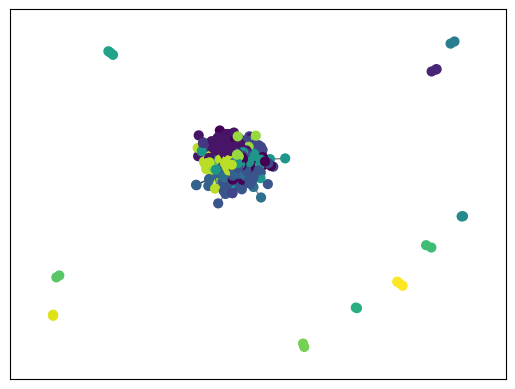

In [6]:
graph = nx.read_gml("/home/debian/Téléchargements/fb100/data/Johns Hopkins55.gml")
Louvain_ComputeAndDraw(graph)